In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import zipfile

In [ ]:
!wget --no-check-certificate \
  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip \
  -O /content/kagglecatsanddogs_3367a.zip

--2021-01-10 07:05:19--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.36.52.129, 2600:1409:12:194::e59, 2600:1409:12:1a1::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.36.52.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/content/kagglecatsanddogs_3367a.zip’

/content/kagglecats 100%[===================>] 786.68M   216MB/s    in 3.9s    

2021-01-10 07:05:23 (201 MB/s) - ‘/content/kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [ ]:
local_zip = '/content/kagglecatsanddogs_3367a.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
! pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio("/content/PetImages", output="/content/", seed=1337, ratio=(.7, .2, .1), group_prefix=None) # default values

Copying files: 25002 files [00:13, 1788.37 files/s]


In [ ]:
import glob,os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
import os,glob
from keras import applications

In [ ]:
def get_files(dir):
  if not os.path.exists(dir):
    return 0
  count = 0
  for current_path,dirs,files in os.walk(dir):
    for dr in dirs:
      count += len(glob.glob(os.path.join(current_path,dr +'/*')))
  return count

In [ ]:
data_training = get_files('/content/train')
data_val = get_files('/content/val')
data_test = get_files('/content/test')
num_classes = len(glob.glob('/content/train' + "/*"))

print('jumlah data training :',data_training)
print('jumlah data val :',data_val)
print('jumlah data test :',data_test)
print('jumlah keals dataset :',num_classes)

jumlah data training : 17495
jumlah data val : 5000
jumlah data test : 2502
jumlah keals dataset : 2


In [ ]:
train_dir = '/content/train'
val_dir = '/content/val'
test_dir = '/content/test'

In [ ]:
import warnings
import os
from PIL import Image
folder_path = train_dir
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
       # Cause all warnings to always be triggered.
        try:
          file_path = os.path.join(sub_folder_path, filee)
          print('** Path: {}  **'.format(file_path), end="\r", flush=True)
          im = Image.open(file_path)
          rgb_im = im.convert('RGB')
          warnings.filterwarnings('error')
        except:
          os.remove(sub_folder_path + '/' +filee)

Exception ignored in: <_io.FileIO name='/content/train/Dog/11849.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Dog/1308.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Dog/4367.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Dog/8730.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Dog/7369.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Dog/6059.jpg' mode='rb' closefd=True>
Exception ignored in: <_io.FileIO name='/content/train/Dog/9188.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Dog/3588.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Dog/11410.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Dog/6238.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Dog/10158.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Dog/3136.jpg' mode='rb' closefd=True>
Exception ignored in: <_io.FileIO name='/content/train/Dog/7112.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Dog/2384.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Dog/2877.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Dog/10401.jpg' mode='rb' closefd=True>
Exception ignored in: <_io.FileIO name='/content/train/Dog/11675.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Dog/1866.jpg' mode='rb' closefd=True>
Exception ignored in: <_io.FileIO name='/content/train/Dog/5604.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Dog/7969.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Dog/11853.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Dog/10747.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Cat/936.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Cat/7968.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Cat/4833.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Cat/11874.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Cat/11935.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Cat/10820.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Cat/10125.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Cat/5553.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Cat/9565.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Cat/9778.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/train/Cat/10501.jpg' mode='rb' closefd=True>


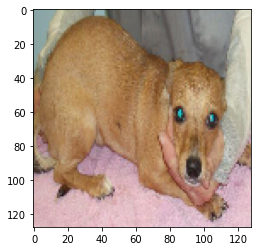

In [ ]:
from keras.preprocessing import image
import numpy as np

img1 = image.load_img('/content/train/Dog/10034.jpg',target_size=(128,128))
plt.imshow(img1)

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
IMG_WIDTH = 128
IMG_HEIGHT = 128

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=64,
        color_mode='rgb',
        interpolation='nearest',
        class_mode='binary')

val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=64,
        color_mode='rgb',
        interpolation='nearest',
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        color_mode = 'rgb',
        shuffle=False
        )

Found 17495 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 2502 images belonging to 2 classes.


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D,Dropout,Flatten,Dense,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
#tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

In [ ]:
from keras.callbacks import EarlyStopping
batch_size = 64

callbacks = [
    EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )]

train = classifier.fit(train_generator,
                            epochs=10,
                            steps_per_epoch = train_generator.samples // batch_size,
                            validation_data = val_generator,
                            validation_steps = val_generator.samples // batch_size,
                            verbose = 1,
                            callbacks = callbacks)

Epoch 1/10
273/273 [==============================] - 122s 443ms/step - loss: 0.7292 - accuracy: 0.5875 - val_loss: 0.6013 - val_accuracy: 0.6817
Epoch 2/10
273/273 [==============================] - 121s 443ms/step - loss: 0.5790 - accuracy: 0.6968 - val_loss: 0.5615 - val_accuracy: 0.7057
Epoch 3/10
273/273 [==============================] - 120s 442ms/step - loss: 0.5278 - accuracy: 0.7354 - val_loss: 0.5040 - val_accuracy: 0.7596
Epoch 4/10
273/273 [==============================] - 120s 441ms/step - loss: 0.4802 - accuracy: 0.7700 - val_loss: 0.4993 - val_accuracy: 0.7640
Epoch 5/10
273/273 [==============================] - 121s 442ms/step - loss: 0.4487 - accuracy: 0.7864 - val_loss: 0.4655 - val_accuracy: 0.7804
Epoch 6/10
273/273 [==============================] - 120s 441ms/step - loss: 0.4301 - accuracy: 0.7959 - val_loss: 0.4488 - val_accuracy: 0.7899
Epoch 7/10
273/273 [==============================] - 120s 440ms/step - loss: 0.3989 - accuracy: 0.8181 - val_loss: 0.4468 -

In [ ]:
model.save('CatDogMobileNet.h5')

In [ ]:
import tensorflow_hub as hub

In [ ]:
from keras.models import load_model
model = load_model('/content/CatDogMobileNet.h5',custom_objects={'KerasLayer': hub.KerasLayer})

In [ ]:
! pip install numpy==1.16.1 

     |████████████████████████████████| 17.3MB 213kB/s 
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.16.1 which is incompatible.
ERROR: tensorflow 2.4.0 has requirement numpy~=1.19.2, but you'll have numpy 1.16.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.4
    Uninstalling numpy-1.19.4:
      Successfully uninstalled numpy-1.19.4


Exception ignored in: <_io.FileIO name='/usr/local/lib/python3.6/dist-packages/numpy-1.16.1.dist-info/top_level.txt' mode='rb' closefd=True>


In [ ]:
import pandas as pd
test_generator.reset
ytesthat = model.predict(test_generator)
df = pd.DataFrame({
    'filename':test_generator.filenames,
    'predict2':ytesthat[:,0],
    'y':test_generator.classes
})

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict2']>0.5
df.y_pred = df.y_pred.astype(int)
df

,filename,predict2,y,y_pred
0,Cat/1.jpg,0.99983,0,1
1,Cat/10.jpg,0.99994,0,1
2,Cat/10018.jpg,0.99890,0,1
3,Cat/1002.jpg,0.99996,0,1
4,Cat/10027.jpg,0.97813,0,1
...,...,...,...,...
2497,Dog/9935.jpg,0.00056,1,0
2498,Dog/9949.jpg,0.00071,1,0
2499,Dog/9964.jpg,0.00040,1,0
2500,Dog/9977.jpg,0.05606,1,0


In [ ]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 5000 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 5000 Validation images : 2477


In [ ]:
#Prediction of test set
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

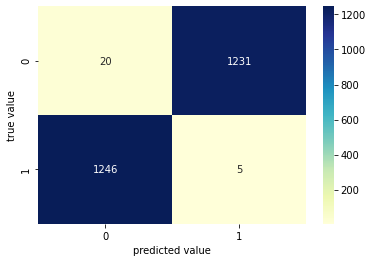

In [ ]:
conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
test_image_batch, test_label_batch = next(iter(test_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (64, 224, 224, 3)


In [ ]:
tf_model_predictions = model.predict(test_image_batch)
tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head()

Prediction results for the first elements


,Cat,Dog
0,0.99983,0.00017
1,0.99994,0.00006
2,0.99890,0.00110
3,0.99996,0.00004
4,0.97813,0.02187


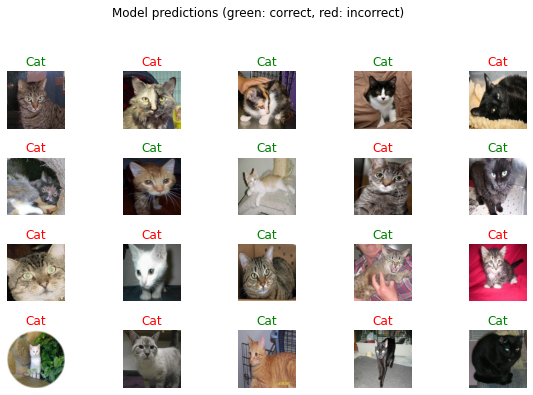

In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(20):
 plt.subplot(6,5,n+1)
 plt.imshow(test_image_batch[n])
 color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
 plt.title(predicted_labels[n].title(), color=color)
 plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")